In [1]:
# 单元格1：导入基础库和设置路径
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

# 设置项目路径（根据你的实际路径调整）
project_root = os.getcwd()  # 如果notebook在项目根目录
# 或者手动指定：project_root = "D:/你的项目路径/"

# 添加src目录到Python路径
src_path = os.path.join(project_root, 'src')
if src_path not in sys.path:
    sys.path.append(src_path)

print(f"项目根目录: {project_root}")
print(f"Python路径: {sys.path}")


项目根目录: C:\Users\17817
Python路径: ['C:\\Users\\17817', 'C:\\Users\\17817\\anaconda3\\python312.zip', 'C:\\Users\\17817\\anaconda3\\DLLs', 'C:\\Users\\17817\\anaconda3\\Lib', 'C:\\Users\\17817\\anaconda3', '', 'C:\\Users\\17817\\anaconda3\\Lib\\site-packages', 'C:\\Users\\17817\\anaconda3\\Lib\\site-packages\\win32', 'C:\\Users\\17817\\anaconda3\\Lib\\site-packages\\win32\\lib', 'C:\\Users\\17817\\anaconda3\\Lib\\site-packages\\Pythonwin', 'C:\\Users\\17817\\src']


In [3]:
# 单元格2：创建项目目录结构
import os
from pathlib import Path

# 创建必要的目录
directories = [
    'config',
    'data/raw',
    'data/processed', 
    'data/interim',
    'data/external',
    'src/data',
    'src/models',
    'src/visualization',
    'src/utils',
    'outputs/figures',
    'outputs/tables',
    'outputs/reports',
    'notebooks'
]

for directory in directories:
    Path(directory).mkdir(parents=True, exist_ok=True)
    print(f"创建目录: {directory}")

print("项目目录结构创建完成！")


创建目录: config
创建目录: data/raw
创建目录: data/processed
创建目录: data/interim
创建目录: data/external
创建目录: src/data
创建目录: src/models
创建目录: src/visualization
创建目录: src/utils
创建目录: outputs/figures
创建目录: outputs/tables
创建目录: outputs/reports
创建目录: notebooks
项目目录结构创建完成！


In [15]:
# 单元格3：数据加载和初步探索
data_path = "E:/Data/" 

try:
    # 加载主要数据
    main_data = pd.read_csv(f"{data_path}/main_data_advanced.csv", encoding='utf-8-sig')
    print("主要数据加载成功！")
    print(f"数据形状: {main_data.shape}")
    print("\n数据列名:")
    print(main_data.columns.tolist())
    
    # 加载OD矩阵数据
    od_matrix = pd.read_csv(f"{data_path}/od_matrix.csv", encoding='utf-8-sig')
    print("\nOD矩阵数据加载成功！")
    print(f"数据形状: {od_matrix.shape}")
    print("\nOD矩阵列名:")
    print(od_matrix.columns.tolist())
    
except Exception as e:
    print(f"数据加载失败: {e}")
    # 如果路径有问题，尝试当前目录
    try:
        main_data = pd.read_csv("main_data_advanced.csv", encoding='utf-8-sig')
        od_matrix = pd.read_csv("od_matrix.csv", encoding='utf-8-sig')
        print("从当前目录加载数据成功！")
    except:
        print("请检查数据文件路径")

主要数据加载成功！
数据形状: (55, 58)

数据列名:
['城市', '年份', '城市代码', '跨境数据传输总量_TB', '入境数据量_TB', '出境数据量_TB', '数据中心数量', '数据中心机架数', '数据中心PUE', '互联网国际出口带宽_Gbps', '互联网内地出口带宽_Gbps', 'IaaS使用量_万核时', 'PaaS使用量_万次调用', 'SaaS活跃用户数_万', '政务API调用量_亿次', '金融API调用量_亿次', '医疗API调用量_亿次', '电商API调用量_亿次', '数据交易额_亿元', '数据交易笔数_万笔', '数据资产登记数_个', '区块链存证量_万条', '数据安全认证企业数', '数据出境评估申请数', '个人信息保护投诉量', 'GDP_亿元', 'GDP增长率_%', '人均GDP_万元', '数字经济核心产业增加值_亿元', '数字经济占GDP比重_%', '第三产业占比_%', '外贸进出口总额_亿元', '外贸依存度_%', '实际利用外资FDI_亿美元', '跨境电商交易额_亿元', '金融科技交易规模_亿元', '上市公司数量', '研发经费投入_亿元', '研发投入强度_%', '发明专利授权量', 'PCT专利申请量', '高新技术企业数', '科技型中小企业数', '独角兽企业数', '独角兽企业估值_亿美元', '科技人才数量_万人', '新增博硕士人数_人', '技术合同成交额_亿元', '5G基站数量', '5G基站密度_个每平方公里', '5G网络覆盖率_%', '千兆光网覆盖率_%', '算力规模_PFLOPS', '物联网连接数_万个', '工业互联网标识解析量_亿次', '智慧城市发展指数', '电子政务发展指数', '网络安全事件数_起']

OD矩阵数据加载成功！
数据形状: (605, 8)

OD矩阵列名:
['年份', '起点城市', '终点城市', '起点代码', '终点代码', '数据传输量_TB', 'API调用频次_万次', '企业合作数据项目数']


In [17]:
# 单元格4：数据预览
print("=== 主要数据预览 ===")
print(f"数据时间段: {main_data['年份'].min()} - {main_data['年份'].max()}")
print(f"包含城市: {main_data['城市'].unique().tolist()}")
print(f"城市数量: {len(main_data['城市'].unique())}")

print("\n前5行数据:")
display(main_data.head())

print("\n数据基本信息:")
print(main_data.info())

print("\n描述性统计:")
display(main_data.describe())

print("\n=== OD矩阵数据预览 ===")
print(f"OD矩阵时间段: {od_matrix['年份'].min()} - {od_matrix['年份'].max()}")
print(f"起点城市: {od_matrix['起点城市'].unique().tolist()}")
print(f"终点城市: {od_matrix['终点城市'].unique().tolist()}")

print("\nOD矩阵前5行:")
display(od_matrix.head())

=== 主要数据预览 ===
数据时间段: 2019 - 2023
包含城市: ['东莞', '中山', '佛山', '广州', '惠州', '江门', '深圳', '澳门', '珠海', '肇庆', '香港']
城市数量: 11

前5行数据:


,城市,年份,城市代码,跨境数据传输总量_TB,入境数据量_TB,出境数据量_TB,数据中心数量,数据中心机架数,数据中心PUE,互联网国际出口带宽_Gbps,...,5G基站数量,5G基站密度_个每平方公里,5G网络覆盖率_%,千兆光网覆盖率_%,算力规模_PFLOPS,物联网连接数_万个,工业互联网标识解析量_亿次,智慧城市发展指数,电子政务发展指数,网络安全事件数_起
0,东莞,2019,8,454.248141,214.647364,239.600777,5,9800,1.270058,5948.622918,...,22344,42.681948,67.8,57.8,493.981338,23819.116923,262.638938,77.508133,83.431697,105
1,东莞,2020,8,366.173532,186.981789,179.191744,7,12012,1.236453,6702.116505,...,14385,27.478510,75.8,66.8,717.714881,26775.629969,119.776847,83.889227,83.017811,117
2,东莞,2021,8,442.812616,215.458482,227.354134,6,7530,1.368989,10108.411030,...,10513,20.082139,83.8,75.8,2952.057551,10472.210604,122.396538,86.818609,94.322752,104
3,东莞,2022,8,689.641625,346.447435,343.194190,10,13280,1.329328,8910.583045,...,18495,35.329513,91.8,84.8,393.807346,7562.388725,109.784170,94.191122,82.342059,99
4,东莞,2023,8,438.009691,230.742190,207.267501,20,17100,1.316628,12735.834801,...,10477,20.013372,98.0,93.8,1090.862645,32957.874011,44.329434,95.000000,95.000000,86



数据基本信息:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 58 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   城市              55 non-null     object 
 1   年份              55 non-null     int64  
 2   城市代码            55 non-null     int64  
 3   跨境数据传输总量_TB     55 non-null     float64
 4   入境数据量_TB        55 non-null     float64
 5   出境数据量_TB        55 non-null     float64
 6   数据中心数量          55 non-null     int64  
 7   数据中心机架数         55 non-null     int64  
 8   数据中心PUE         55 non-null     float64
 9   互联网国际出口带宽_Gbps  55 non-null     float64
 10  互联网内地出口带宽_Gbps  55 non-null     float64
 11  IaaS使用量_万核时     55 non-null     float64
 12  PaaS使用量_万次调用    55 non-null     float64
 13  SaaS活跃用户数_万     55 non-null     float64
 14  政务API调用量_亿次     55 non-null     float64
 15  金融API调用量_亿次     55 non-null     float64
 16  医疗API调用量_亿次     55 non-null     float64
 17  电商API调用量_亿次     55 non-null 

,年份,城市代码,跨境数据传输总量_TB,入境数据量_TB,出境数据量_TB,数据中心数量,数据中心机架数,数据中心PUE,互联网国际出口带宽_Gbps,互联网内地出口带宽_Gbps,...,5G基站数量,5G基站密度_个每平方公里,5G网络覆盖率_%,千兆光网覆盖率_%,算力规模_PFLOPS,物联网连接数_万个,工业互联网标识解析量_亿次,智慧城市发展指数,电子政务发展指数,网络安全事件数_起
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,...,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,2021.000000,6.000000,397.510646,200.732248,196.778398,6.981818,9699.600000,1.325111,6677.912593,11876.197920,...,18579.381818,90.684906,82.661818,74.878182,699.709765,21552.825350,135.163807,85.390442,86.523893,77.981818
std,1.427248,3.191424,229.440550,116.778312,113.383880,3.556376,4889.813041,0.072807,3043.690703,4808.964297,...,8648.907260,110.197681,11.190811,12.924491,482.759473,11771.763878,92.043380,8.952828,6.204694,54.626168
min,2019.000000,1.000000,106.500694,54.177630,52.323065,3.000000,2472.000000,1.224008,1000.000000,2287.293256,...,4460.000000,9.369748,64.800000,54.800000,170.825940,5839.961842,8.941649,64.232653,73.220311,3.000000
25%,2020.000000,3.000000,247.425804,125.861494,117.186275,5.000000,5894.000000,1.257846,4789.138378,9011.678426,...,10905.500000,28.876424,73.500000,64.500000,385.615848,14518.595580,66.094893,78.353022,82.423648,36.500000
50%,2021.000000,6.000000,358.709234,169.540925,170.881652,7.000000,9584.000000,1.325669,6270.324315,11047.271365,...,17442.000000,49.566845,82.500000,74.500000,605.442577,17608.941582,121.032303,86.818609,85.462765,64.000000
75%,2022.000000,9.000000,477.146133,237.097843,244.467993,8.000000,11812.000000,1.380016,8427.173436,14087.350108,...,24356.500000,102.622951,92.300000,85.300000,788.032342,27405.689890,181.235120,94.177079,92.143523,101.500000
max,2023.000000,11.000000,1220.601086,617.364610,603.236476,20.000000,24855.000000,1.496101,13357.319404,26021.752263,...,37035.000000,621.323529,98.000000,95.000000,2952.057551,58600.474838,395.342512,95.000000,95.000000,193.000000



=== OD矩阵数据预览 ===
OD矩阵时间段: 2019 - 2023
起点城市: ['东莞', '中山', '佛山', '广州', '惠州', '江门', '深圳', '澳门', '珠海', '肇庆', '香港']
终点城市: ['东莞', '中山', '佛山', '广州', '惠州', '江门', '深圳', '澳门', '珠海', '肇庆', '香港']

OD矩阵前5行:


,年份,起点城市,终点城市,起点代码,终点代码,数据传输量_TB,API调用频次_万次,企业合作数据项目数
0,2019,东莞,东莞,8,8,4157.026162,1.064690e+06,51
1,2019,东莞,中山,8,9,282.187395,5.630170e+04,3
2,2019,东莞,佛山,8,6,273.069917,1.347584e+05,3
3,2019,东莞,广州,8,3,863.707559,1.153784e+05,9
4,2019,东莞,惠州,8,7,261.995898,5.762592e+04,0


数值型数据形状: (55, 57)


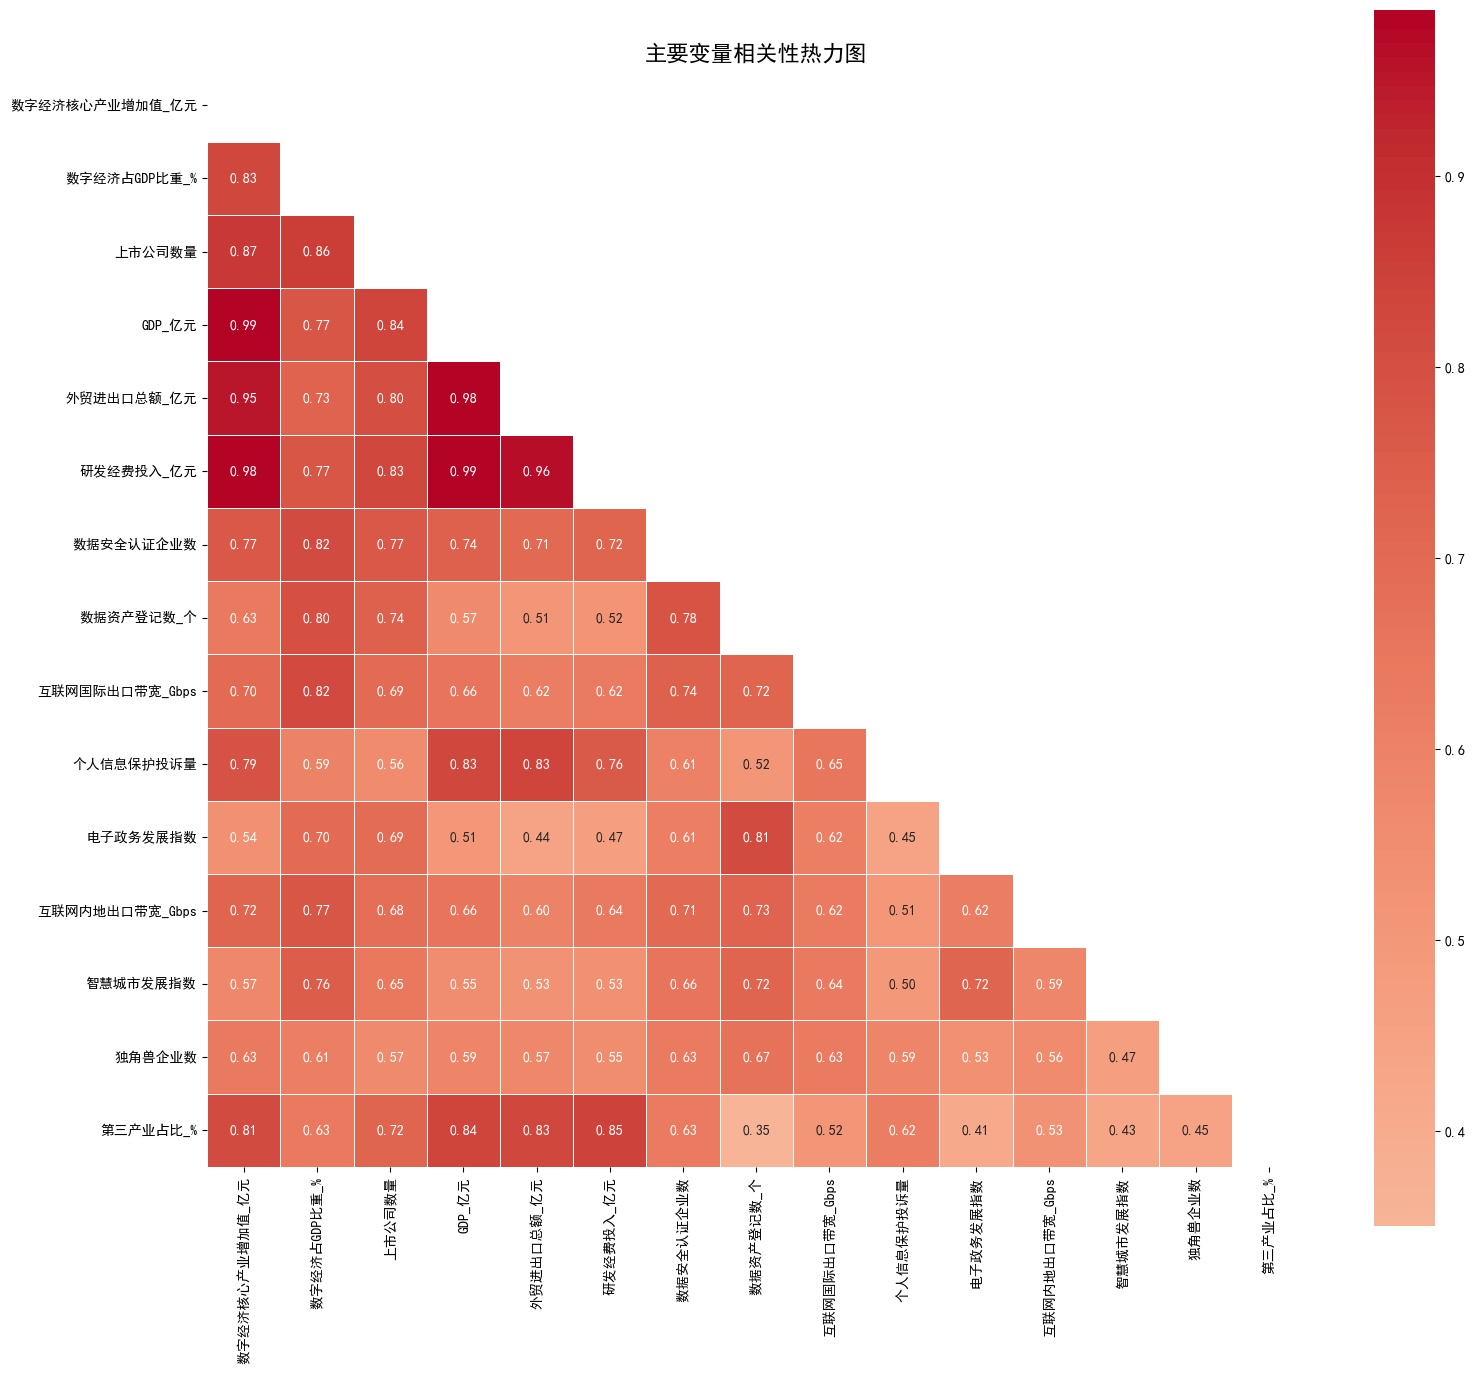

In [19]:
# 单元格5：探索性数据分析
# 选择数值型数据
numeric_data = main_data.select_dtypes(include=[np.number])

print("数值型数据形状:", numeric_data.shape)

# 1. 绘制相关性热力图
plt.figure(figsize=(16, 14))
corr_matrix = numeric_data.corr()

# 选择相关性较高的变量（避免图太拥挤）
high_corr_vars = corr_matrix.abs().sum().sort_values(ascending=False).head(15).index
corr_subset = numeric_data[high_corr_vars].corr()

mask = np.triu(np.ones_like(corr_subset, dtype=bool))
sns.heatmap(corr_subset, mask=mask, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, fmt='.2f')
plt.title('主要变量相关性热力图', fontsize=16)
plt.tight_layout()
plt.show()


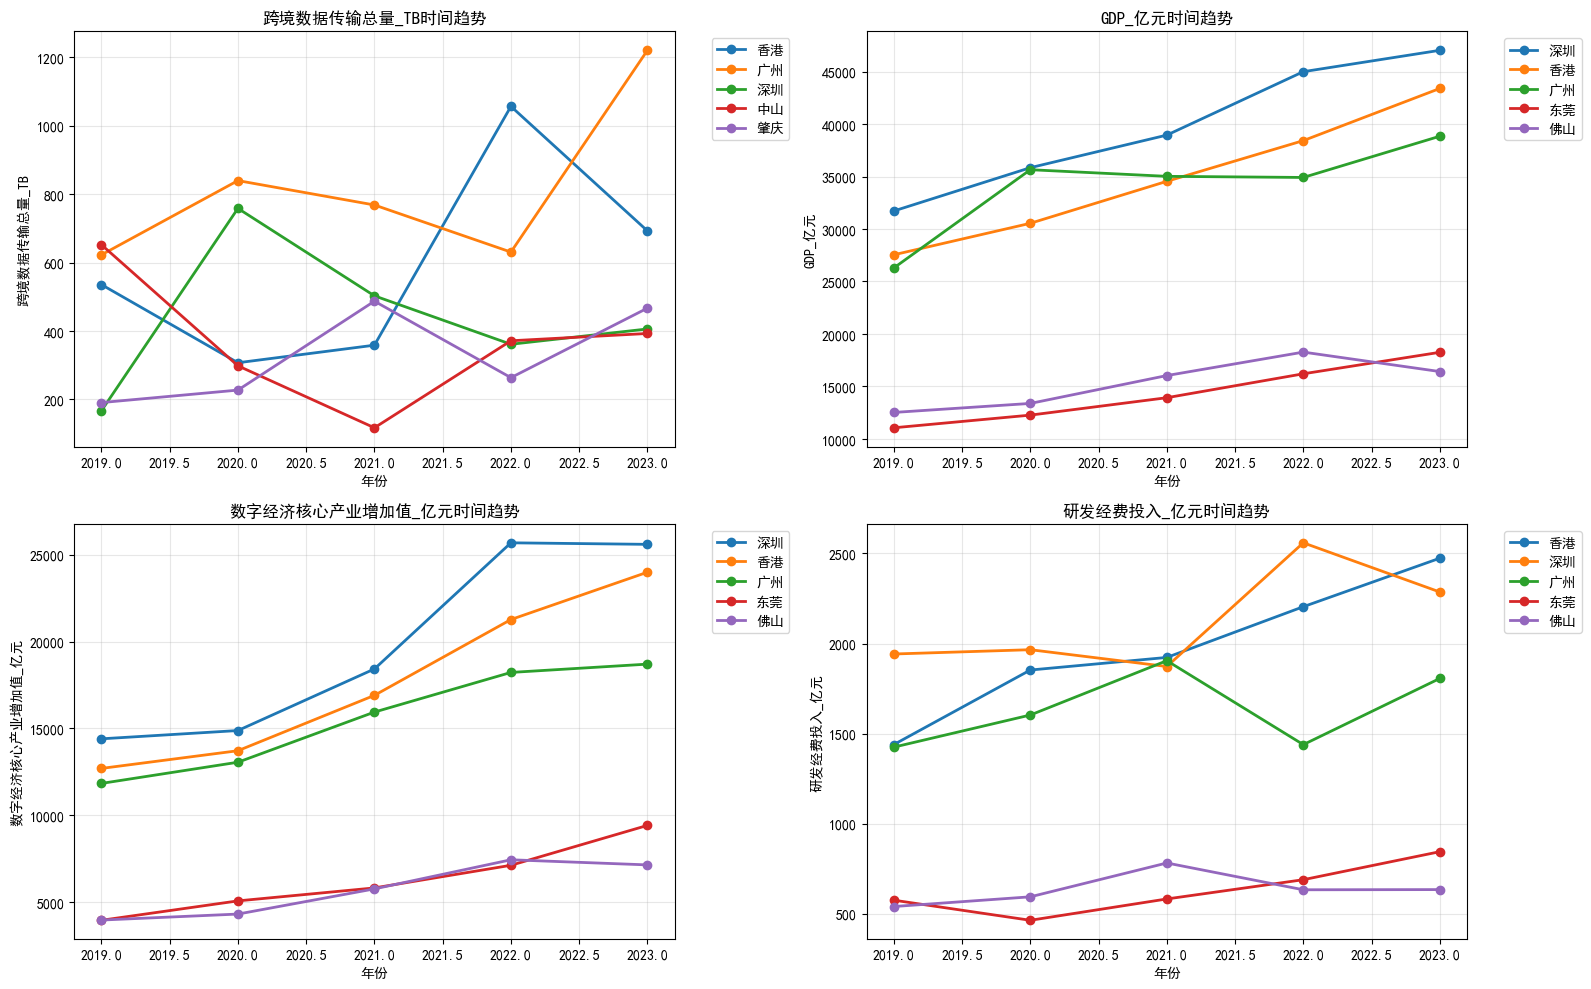

In [21]:
# 单元格6：时间序列分析
# 选择关键指标
key_metrics = ['跨境数据传输总量_TB', 'GDP_亿元', '数字经济核心产业增加值_亿元', '研发经费投入_亿元']
available_metrics = [m for m in key_metrics if m in main_data.columns]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for i, metric in enumerate(available_metrics[:4]):
    # 按城市和年份分组
    city_trends = main_data.pivot_table(values=metric, index='年份', columns='城市', aggfunc='mean')
    
    # 选择变化明显的几个城市
    city_variation = city_trends.std().sort_values(ascending=False)
    top_cities = city_variation.head(5).index
    
    city_trends[top_cities].plot(ax=axes[i], linewidth=2, marker='o')
    axes[i].set_title(f'{metric}时间趋势')
    axes[i].set_ylabel(metric)
    axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



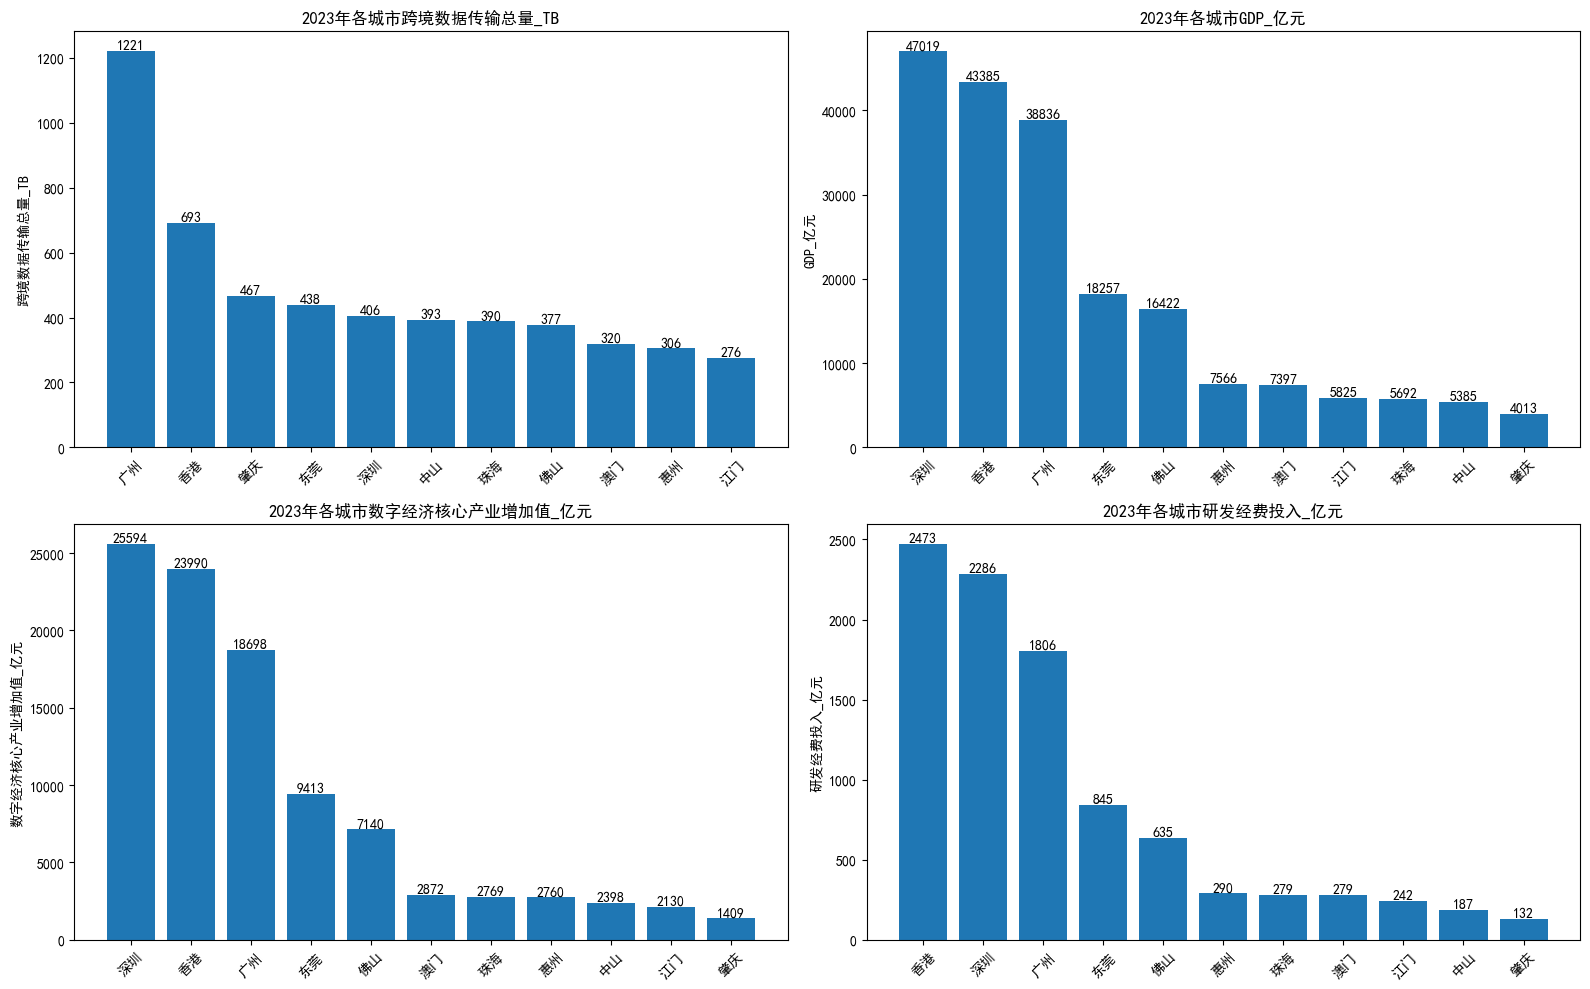

In [23]:
# 单元格7：城市比较分析
# 选择2023年数据进行城市比较
data_2023 = main_data[main_data['年份'] == 2023]

# 选择比较的指标
comparison_metrics = [
    '跨境数据传输总量_TB', 
    'GDP_亿元', 
    '数字经济核心产业增加值_亿元',
    '研发经费投入_亿元'
]

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.ravel()

for i, metric in enumerate(comparison_metrics):
    if metric in data_2023.columns:
        city_data = data_2023[['城市', metric]].sort_values(metric, ascending=False)
        axes[i].bar(city_data['城市'], city_data[metric])
        axes[i].set_title(f'2023年各城市{metric}')
        axes[i].set_ylabel(metric)
        axes[i].tick_params(axis='x', rotation=45)
        
        # 在柱子上添加数值
        for j, v in enumerate(city_data[metric]):
            axes[i].text(j, v, f'{v:.0f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

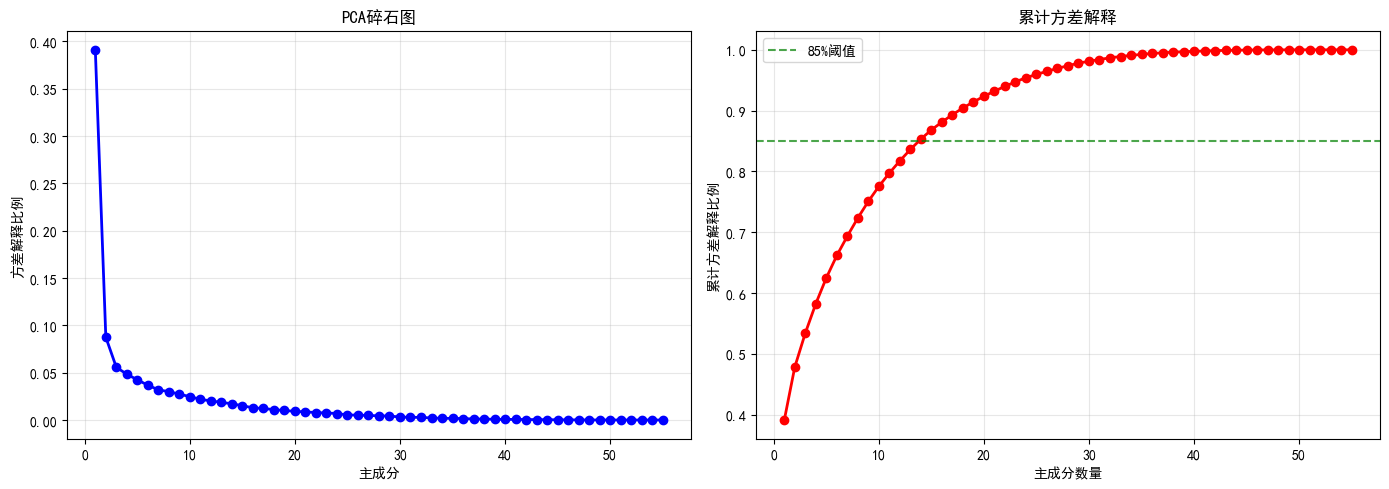

达到85%方差解释率需要的主成分数量: 14
前14个主成分的累计方差解释率: 0.853


In [27]:
# 单元格8：主成分分析
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca_data = main_data.select_dtypes(include=[np.number]).ffill().fillna(0)

# 数据标准化
scaler = StandardScaler()
data_scaled = scaler.fit_transform(pca_data)

# 执行PCA
pca = PCA()
pca.fit(data_scaled)

# 绘制碎石图
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# 碎石图
ax1.plot(range(1, len(explained_variance) + 1), explained_variance, 'bo-', linewidth=2)
ax1.set_xlabel('主成分')
ax1.set_ylabel('方差解释比例')
ax1.set_title('PCA碎石图')
ax1.grid(True, alpha=0.3)

# 累计方差图
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'ro-', linewidth=2)
ax2.set_xlabel('主成分数量')
ax2.set_ylabel('累计方差解释比例')
ax2.set_title('累计方差解释')
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0.85, color='g', linestyle='--', alpha=0.7, label='85%阈值')
ax2.legend()

plt.tight_layout()
plt.show()

# 确定主成分数量
n_components = np.argmax(cumulative_variance >= 0.85) + 1
print(f"达到85%方差解释率需要的主成分数量: {n_components}")

# 使用选择的主成分数量重新拟合
pca_final = PCA(n_components=n_components)
principal_components = pca_final.fit_transform(data_scaled)

print(f"前{n_components}个主成分的累计方差解释率: {cumulative_variance[n_components-1]:.3f}")

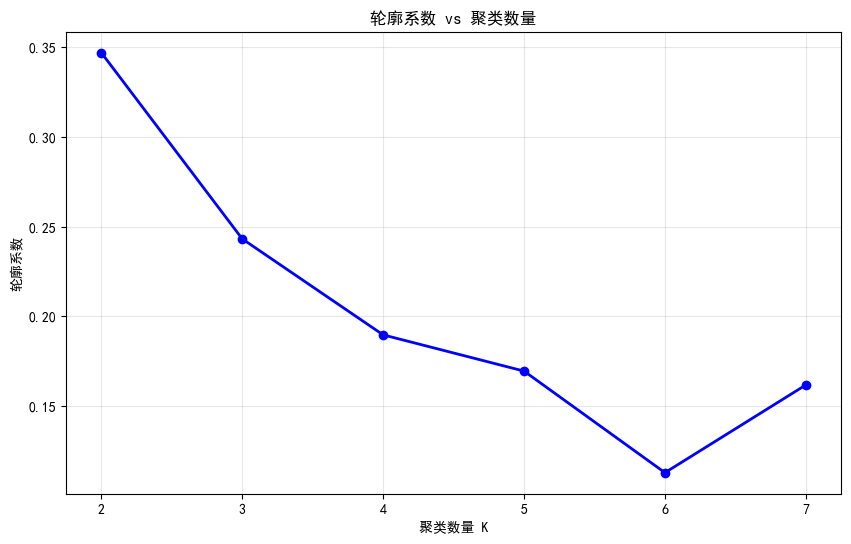

最优聚类数量: 2 (轮廓系数: 0.347)
聚类分析结果:


,跨境数据传输总量_TB,GDP_亿元,数字经济核心产业增加值_亿元,城市数量
cluster,,,,
0,608.807375,35623.004528,17465.609428,15
1,318.274373,7642.443872,2934.260186,40


簇 0: 东莞, 广州, 深圳, 香港
簇 1: 东莞, 中山, 佛山, 惠州, 江门, 澳门, 珠海, 肇庆, 香港


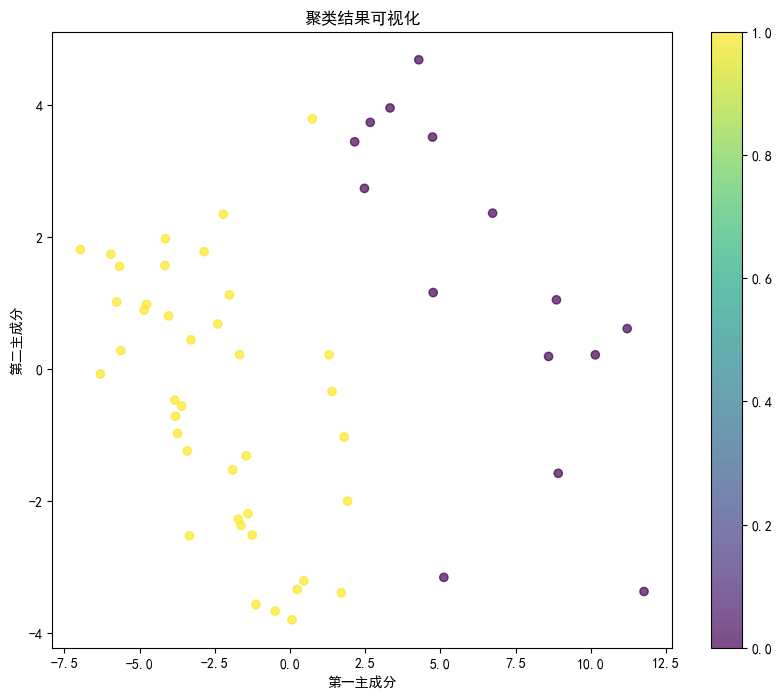

In [29]:
# 单元格9：聚类分析
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

# 使用PCA降维后的数据进行聚类
X = principal_components

# 寻找最优聚类数
k_range = range(2, 8)
silhouette_scores = []

for k in k_range:
    # 显式设置n_init参数，避免FutureWarning
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    
    if len(np.unique(labels)) > 1:  # 确保有多个簇
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(0)

# 绘制轮廓系数
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'bo-', linewidth=2)
plt.xlabel('聚类数量 K')
plt.ylabel('轮廓系数')
plt.title('轮廓系数 vs 聚类数量')
plt.grid(True, alpha=0.3)
plt.show()

# 选择最优K
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"最优聚类数量: {optimal_k} (轮廓系数: {max(silhouette_scores):.3f})")

# 使用最优K进行聚类（显式设置n_init）
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X)

# 将聚类结果添加到数据中
main_data['cluster'] = cluster_labels

# 分析聚类结果
cluster_analysis = main_data.groupby('cluster').agg({
    '跨境数据传输总量_TB': 'mean',
    'GDP_亿元': 'mean', 
    '数字经济核心产业增加值_亿元': 'mean',
    '城市': 'count'
}).rename(columns={'城市': '城市数量'})

print("聚类分析结果:")
display(cluster_analysis)

# 查看每个簇包含的城市
for cluster_id in range(optimal_k):
    cities_in_cluster = main_data[main_data['cluster'] == cluster_id]['城市'].unique()
    print(f"簇 {cluster_id}: {', '.join(cities_in_cluster)}")

# 可视化聚类结果（使用前两个主成分）
plt.figure(figsize=(10, 8))
scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1], 
                     c=cluster_labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter)
plt.xlabel('第一主成分')
plt.ylabel('第二主成分')
plt.title('聚类结果可视化')
plt.show()

网络基本信息:
节点数: 11
边数: 110
网络密度: 1.0000

城市中心性排名:


,度中心性,中介中心性,接近中心性
东莞,2.0,0.0,1.0
中山,2.0,0.0,1.0
佛山,2.0,0.0,1.0
广州,2.0,0.0,1.0
惠州,2.0,0.0,1.0
江门,2.0,0.0,1.0
深圳,2.0,0.0,1.0
澳门,2.0,0.0,1.0
珠海,2.0,0.0,1.0
肇庆,2.0,0.0,1.0


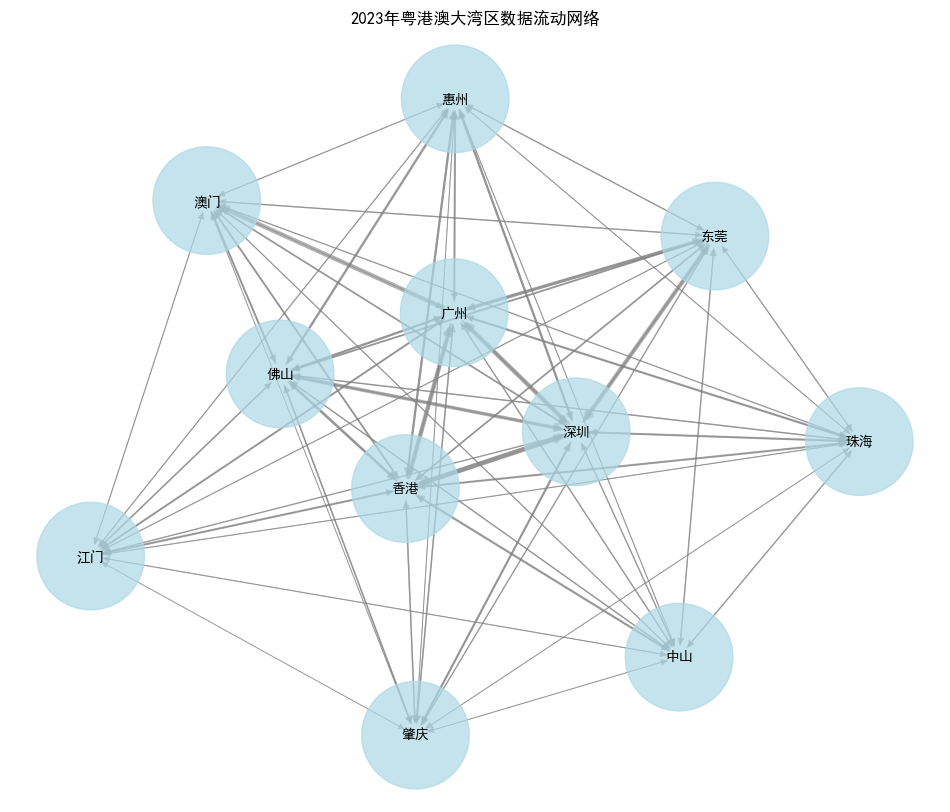

In [31]:
# 单元格10：网络分析
import networkx as nx

# 构建2023年的网络
od_2023 = od_matrix[od_matrix['年份'] == 2023]

# 创建有向图
G = nx.DiGraph()

# 添加节点和边
for _, row in od_2023.iterrows():
    source = row['起点城市']
    target = row['终点城市']
    weight = row['数据传输量_TB']
    
    if source != target:  # 避免自环
        G.add_edge(source, target, weight=weight)

print(f"网络基本信息:")
print(f"节点数: {G.number_of_nodes()}")
print(f"边数: {G.number_of_edges()}")
print(f"网络密度: {nx.density(G):.4f}")

# 计算中心性指标
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

# 创建中心性DataFrame
centrality_df = pd.DataFrame({
    '度中心性': degree_centrality,
    '中介中心性': betweenness_centrality,
    '接近中心性': closeness_centrality
})

print("\n城市中心性排名:")
display(centrality_df.sort_values('度中心性', ascending=False))

# 可视化网络
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=2, iterations=50)

# 节点大小基于度中心性
node_sizes = [3000 * degree_centrality[node] for node in G.nodes()]

# 边宽度基于权重
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]
max_weight = max(edge_weights) if edge_weights else 1
edge_widths = [0.5 + 3 * w / max_weight for w in edge_weights]

nx.draw_networkx_nodes(G, pos, node_size=node_sizes, 
                      node_color='lightblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=edge_widths, 
                      alpha=0.6, edge_color='gray', arrows=True)
nx.draw_networkx_labels(G, pos, font_size=10)

plt.title("2023年粤港澳大湾区数据流动网络")
plt.axis('off')
plt.show()